     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6     

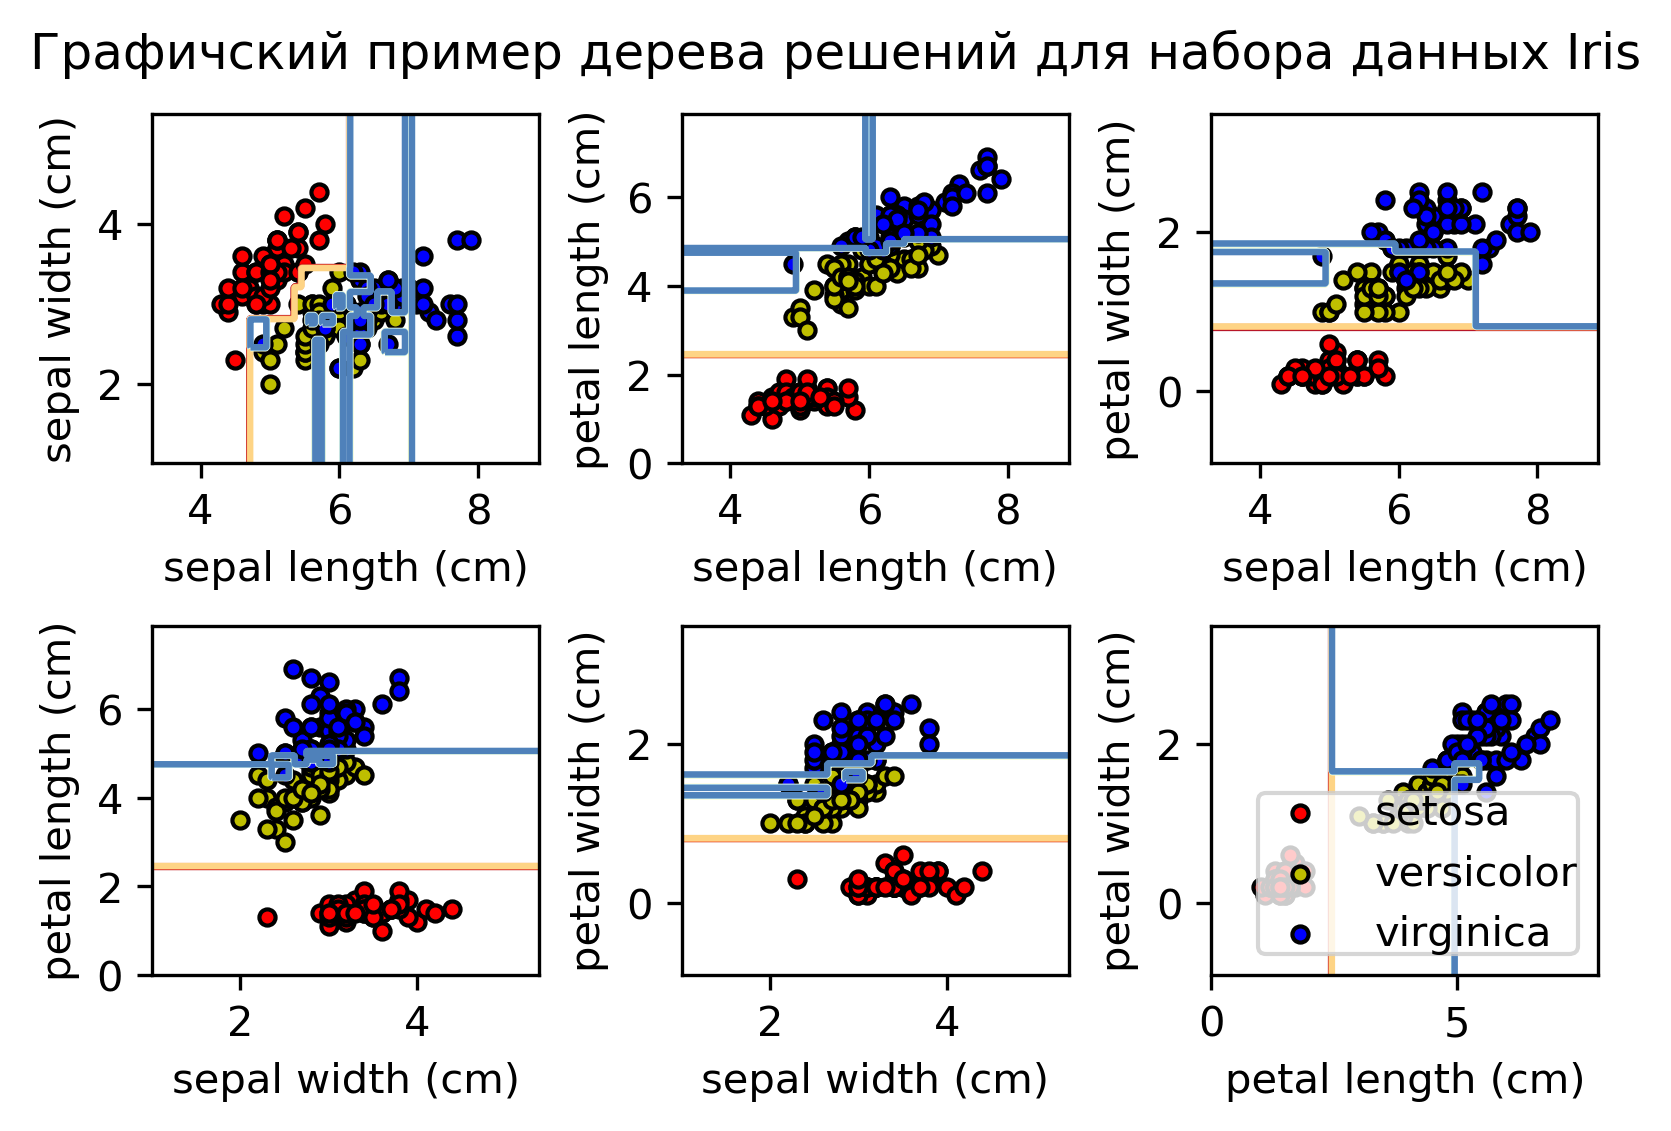

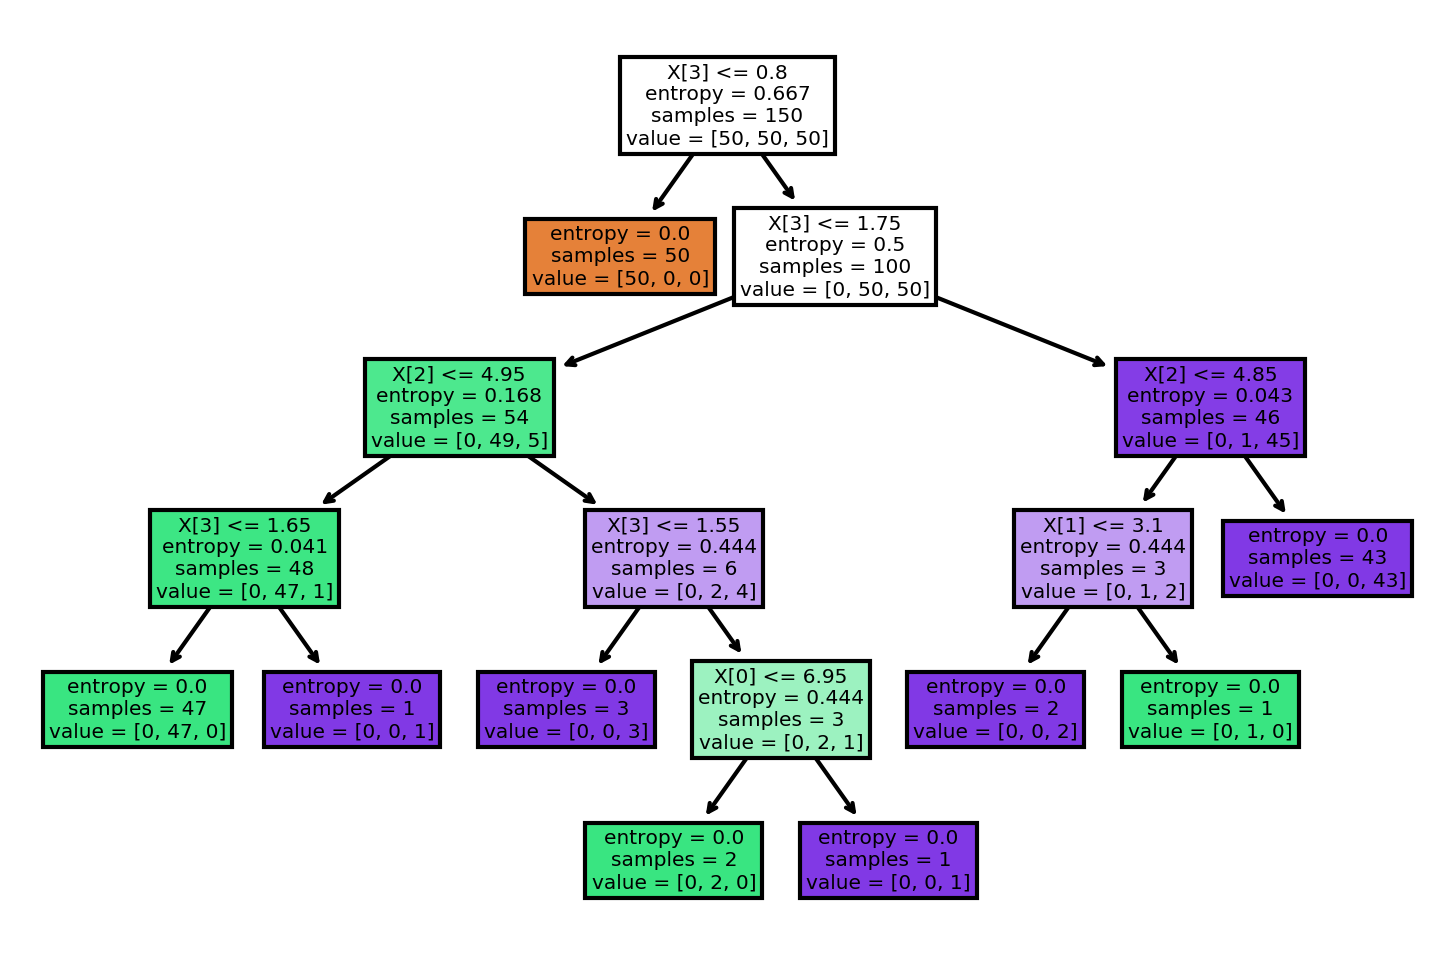

In [3]:
#Импортируем все необходимые библиотеки.

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd

#Задаем параметры
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
#Задаем параметры для визуализации
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
#Задаем набор данных iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#выведем набор данных

print(df)
#берем только две соответствующие функции
for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X = iris.data[:,pair]
    y = iris.target
    #Тренировка 
    clf = DecisionTreeClassifier().fit(X,y)
    plt.subplot(2,3,pairidx + 1)
    x_min,x_max = X[:,0].min() -1,X[:,0].max() +1
    y_min,y_max = X[:,1].min() -1,X[:,1].max() +1
    # Генеруем матрицу координат точек сетки
    xx, yy = np.meshgrid(np.arange(x_min,x_max,plot_step),    np.arange(y_min,y_max,plot_step)) 
    plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)
    # Преобразуем многомерного массива в одномерный массив
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    #Выведем на экран
    print(xx.shape,yy.shape)
    Z = Z.reshape(xx.shape)
    cs = plt.contour(xx,yy,Z,cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    #построим тренировачные точки
    for i, color in zip(range(n_classes),plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0],X[idx, 1],c=color, label=iris.target_names[i],cmap=plt.cm.RdYlBu,edgecolor="black",s=15)   
        
plt.suptitle("Графичский пример дерева решений для набора данных Iris")
plt.legend(loc="lower right",borderpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data,iris.target)
plot_tree(clf,filled=True)
plt.show()
#sepal -чашелистник  petal-липисток

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree


In [14]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [23]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, Y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

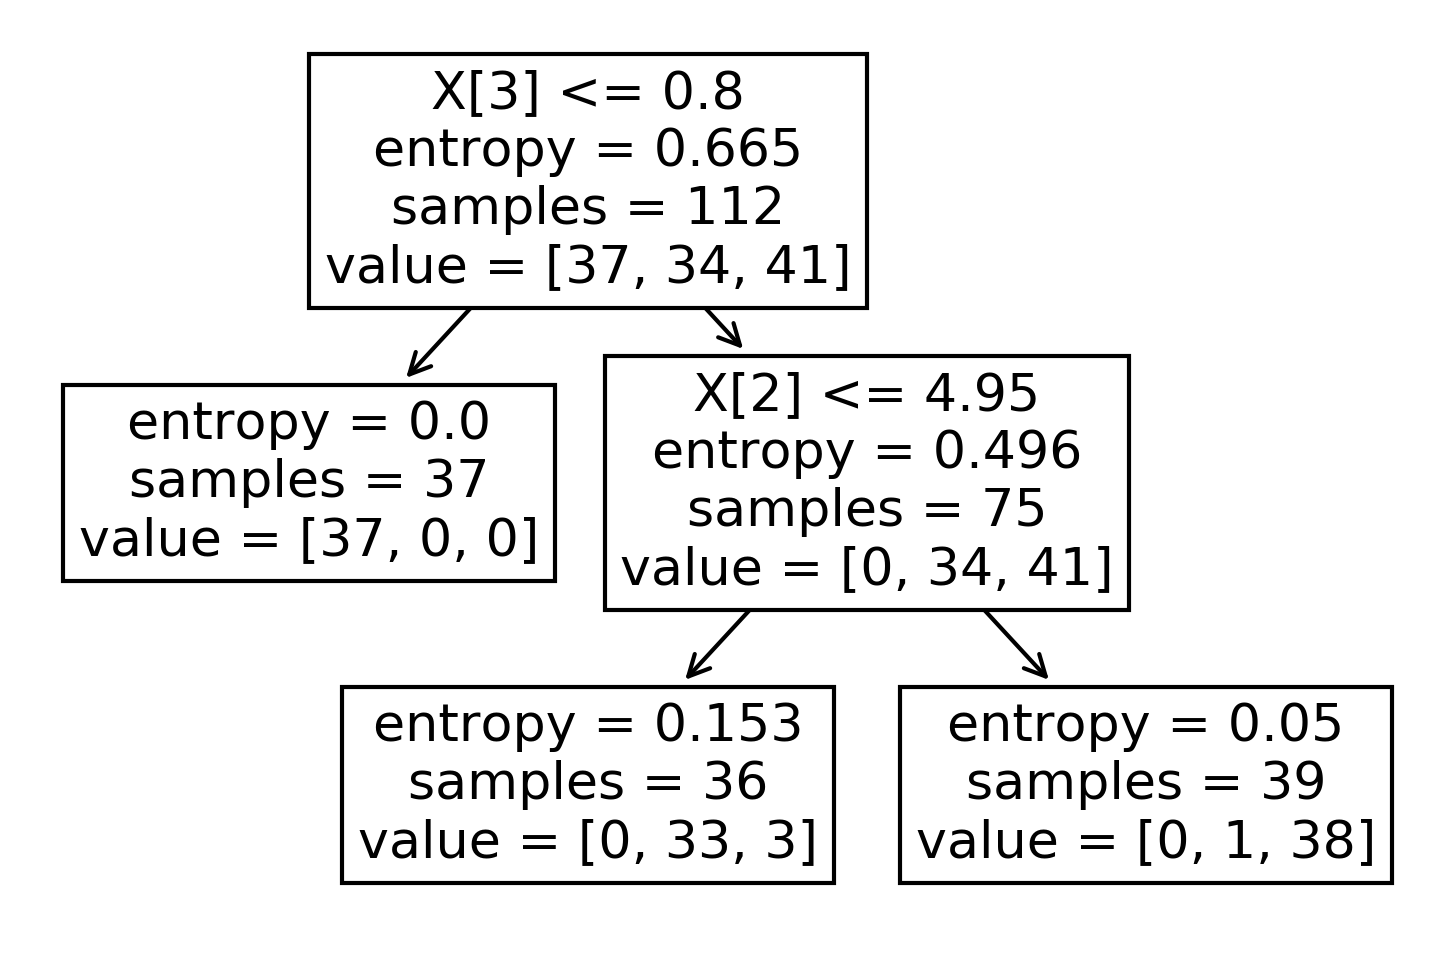

In [24]:
tree.plot_tree(clf);


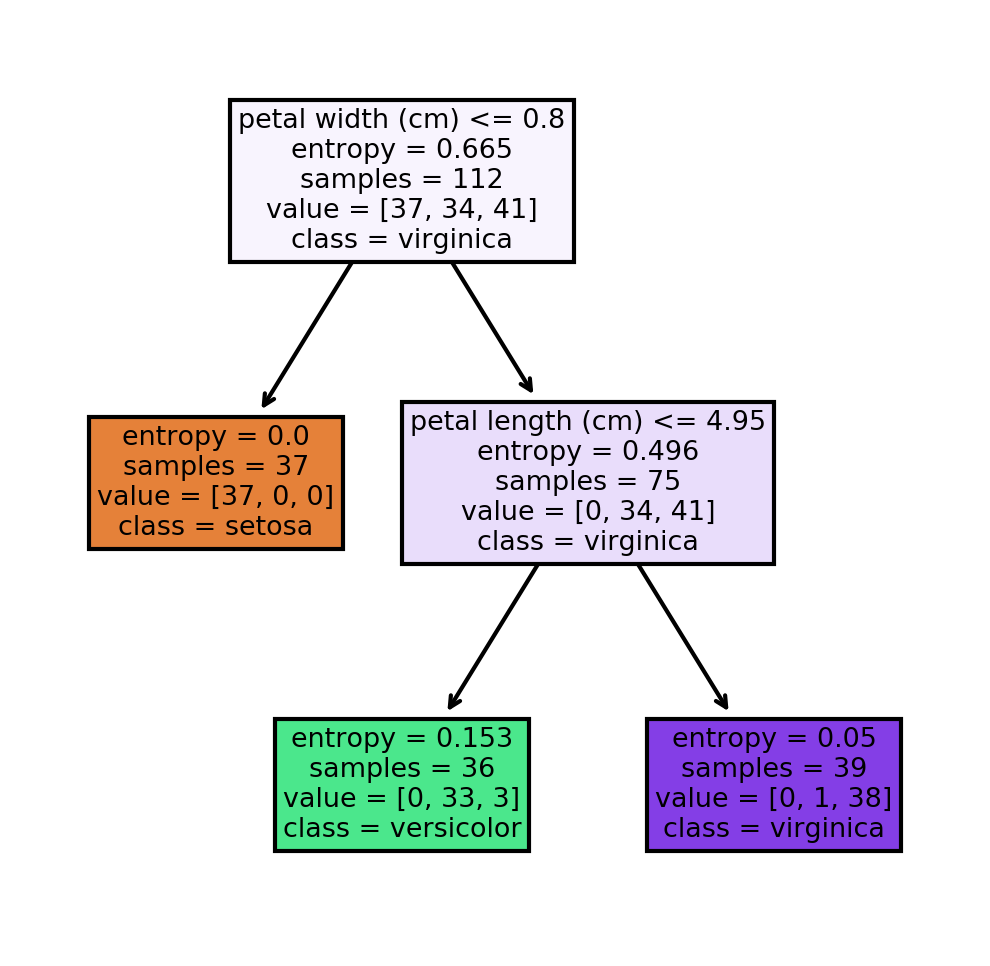

In [25]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')


In [28]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)


In [29]:
conda install python-graphviz


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tbb-2018.0.5               |       he980bc4_0         150 KB
    ------------------------------------------------------------
                                           Total:         150 KB

The following NEW packages will be INSTALLED:

  tbb                pkgs/main/win-64::tbb-2018.0.5-he980bc4_0




tbb-2018.0.5         | 150 KB    |            |   0% 
tbb-2018.0.5         | 150 KB    | #          |  11% 
tbb-2018.0.5         | 150 KB    | ##1        |  21% 
tbb-2018.0.5         | 150 KB    | ####2      |  43% 
tbb-2018.0.5         | 150 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...workin


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.07=py37_0
  - defaults/win-64::numba==0.44.1=py37hf9181ef_0


In [30]:
dot -Tpng tree.dot -o tree.png


SyntaxError: invalid syntax (<ipython-input-30-70e48a2729eb>, line 1)